# File with the scaler used to transform the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from scipy import stats
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

In [2]:
!pip install category_encoders

In [3]:
#We import the category_encoders library to encode the categorical data.
#This is converting them to integer format so they can be provided to the model.
import category_encoders as ce

In [4]:
ccm= pd.read_excel('creditcardmarketing.xlsx')

In [5]:
ccm.head(10)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [6]:
encoder= ce.OrdinalEncoder(cols=['Income Level'], return_df=True, mapping=[{'col':'Income Level', 'mapping':{'Low':1, 'Medium':2, 'High':3}}])
ccm['new_income_level'] = encoder.fit_transform(ccm['Income Level'])

In [7]:
encoder = ce.OrdinalEncoder(cols=['Offer Accepted'], return_df=True, mapping=[{'col':'Offer Accepted', 'mapping':{'No':0, 'Yes':1}}])
ccm['new_offer_accepted'] = encoder.fit_transform(ccm['Offer Accepted'])

In [8]:
encoder = ce.OrdinalEncoder(cols=['Credit Rating'], return_df=True, mapping=[{'col':'Credit Rating', 'mapping':{'Low':1, 'Medium':2, 'High':3}}])
ccm['new_credit_rating'] = encoder.fit_transform(ccm['Credit Rating'])

In [9]:
encoder = ce.OrdinalEncoder(cols=['Own Your Home'], return_df=True, mapping=[{'col':'Own Your Home', 'mapping':{'No':0, 'Yes':1}}])
ccm['new_own_your_home'] = encoder.fit_transform(ccm['Own Your Home'])

In [10]:
encoder = ce.OrdinalEncoder(cols=['Overdraft Protection'], return_df=True, mapping=[{'col':'Overdraft Protection', 'mapping':{'No':0, 'Yes':1}}])
ccm['new_overdraft_protection'] = encoder.fit_transform(ccm['Overdraft Protection'])

In [11]:
encoder = ce.OrdinalEncoder(cols=['Mailer Type'], return_df=True, mapping=[{'col':'Mailer Type', 'mapping':{'Letter':1, 'Postcard':2, 'Email':3}}])
ccm['new_mailer_type'] = encoder.fit_transform(ccm['Mailer Type'])

In [12]:
encoder = ce.OrdinalEncoder(cols=['Reward'], return_df=True, mapping=[{'col':'Reward', 'mapping':{'Air Miles':1, 'Cash Back':2, 'Points':3}}])
ccm['new_reward'] = encoder.fit_transform(ccm['Reward'])

In [13]:
ccm.head(10)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,...,Q2 Balance,Q3 Balance,Q4 Balance,new_income_level,new_offer_accepted,new_credit_rating,new_own_your_home,new_overdraft_protection,new_mailer_type,new_reward
0,1,No,Air Miles,Letter,High,1,No,High,2,1,...,877.0,1095.0,1002.0,3,0,3,0,0,1,1
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,...,106.0,78.0,366.0,2,0,2,1,0,1,1
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,...,352.0,145.0,242.0,3,0,2,1,0,2,1
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,...,1760.0,1119.0,419.0,2,0,3,0,0,1,1
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,...,1357.0,982.0,365.0,2,0,2,1,0,1,1
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,...,1365.0,750.0,497.0,2,0,3,0,0,1,1
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,...,188.0,347.0,132.0,2,0,2,0,0,1,1
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,...,391.0,285.0,306.0,1,0,2,1,0,2,2
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,...,891.0,882.0,1353.0,2,0,1,1,0,2,1
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,...,1454.0,514.0,115.0,3,0,1,1,0,1,1


In [14]:
ccm =ccm.drop(['Income Level', 'Offer Accepted', 'Credit Rating', 'Own Your Home', 'Overdraft Protection', 'Mailer Type', 'Reward'], axis=1)

In [15]:
ccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Number           18000 non-null  int64  
 1   # Bank Accounts Open      18000 non-null  int64  
 2   # Credit Cards Held       18000 non-null  int64  
 3   # Homes Owned             18000 non-null  int64  
 4   Household Size            18000 non-null  int64  
 5   Average Balance           17976 non-null  float64
 6   Q1 Balance                17976 non-null  float64
 7   Q2 Balance                17976 non-null  float64
 8   Q3 Balance                17976 non-null  float64
 9   Q4 Balance                17976 non-null  float64
 10  new_income_level          18000 non-null  int32  
 11  new_offer_accepted        18000 non-null  int32  
 12  new_credit_rating         18000 non-null  int32  
 13  new_own_your_home         18000 non-null  int32  
 14  new_ov

In [16]:
ccm.dropna(inplace=True)

Check for null values:

<AxesSubplot:>

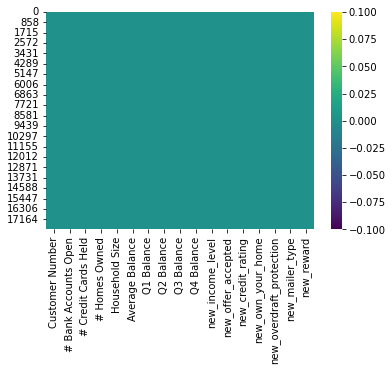

In [17]:
sns.heatmap(ccm.isnull(), cmap='viridis')

In [18]:
ccm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Number           17976 non-null  int64  
 1   # Bank Accounts Open      17976 non-null  int64  
 2   # Credit Cards Held       17976 non-null  int64  
 3   # Homes Owned             17976 non-null  int64  
 4   Household Size            17976 non-null  int64  
 5   Average Balance           17976 non-null  float64
 6   Q1 Balance                17976 non-null  float64
 7   Q2 Balance                17976 non-null  float64
 8   Q3 Balance                17976 non-null  float64
 9   Q4 Balance                17976 non-null  float64
 10  new_income_level          17976 non-null  int32  
 11  new_offer_accepted        17976 non-null  int32  
 12  new_credit_rating         17976 non-null  int32  
 13  new_own_your_home         17976 non-null  int32  
 14  new_ov

In [19]:
ccm.head(20)
#We have now created the new dataset that we will work with from now on.

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,new_income_level,new_offer_accepted,new_credit_rating,new_own_your_home,new_overdraft_protection,new_mailer_type,new_reward
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,3,0,3,0,0,1,1
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,2,0,2,1,0,1,1
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,3,0,2,1,0,2,1
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,2,0,3,0,0,1,1
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,2,0,2,1,0,1,1
5,6,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0,2,0,3,0,0,1,1
6,7,1,2,1,3,283.75,468.0,188.0,347.0,132.0,2,0,2,0,0,1,1
7,8,1,4,1,4,278.50,132.0,391.0,285.0,306.0,1,0,2,1,0,2,2
8,9,1,2,1,4,1005.00,894.0,891.0,882.0,1353.0,2,0,1,1,0,2,1
9,10,2,3,2,4,974.25,1814.0,1454.0,514.0,115.0,3,0,1,1,0,1,1


In [20]:
ccm.to_csv('nuevo_ccm.csv', index = False)

In [21]:
pd.read_csv('nuevo_ccm.csv').head()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,new_income_level,new_offer_accepted,new_credit_rating,new_own_your_home,new_overdraft_protection,new_mailer_type,new_reward
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,3,0,3,0,0,1,1
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,2,0,2,1,0,1,1
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,3,0,2,1,0,2,1
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,2,0,3,0,0,1,1
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,2,0,2,1,0,1,1
